In [1]:
import pandas as pd
import yfinance as yf
import os

In [2]:
btc_ticker = yf.Ticker('BTC-USD')

In [3]:
btc = btc_ticker.history(period = 'max')

In [22]:
btc.index = pd.to_datetime(btc.index).tz_localize(None)

In [23]:
btc

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-12-06,44080.023438,44265.769531,43478.082031,43746.445312,29909761586
2023-12-07,43769.132812,44042.589844,42880.648438,43292.664062,27635760671
2023-12-08,43293.136719,44705.515625,43125.296875,44166.601562,24421116687


In [7]:
del btc['Dividends']
del btc['Stock Splits']

In [8]:
btc

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-12-06 00:00:00+00:00,44080.023438,44265.769531,43478.082031,43746.445312,29909761586
2023-12-07 00:00:00+00:00,43769.132812,44042.589844,42880.648438,43292.664062,27635760671
2023-12-08 00:00:00+00:00,43293.136719,44705.515625,43125.296875,44166.601562,24421116687


<Axes: xlabel='Date'>

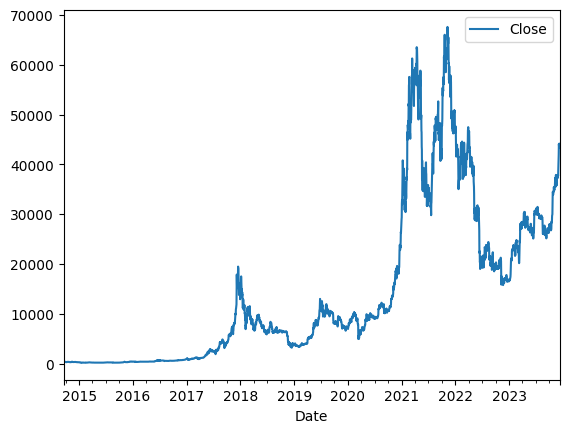

In [10]:
btc.plot.line(y='Close', use_index='True')

In [14]:
wiki = pd.read_csv('https://github.com/sainihimanshu1999/Machine_Learning/raw/main/Bitcoin%20Price%20prediction%20-%20Xgboost/wikipedia_edit.csv',index_col=0, parse_dates=True)

In [15]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2023-12-06,17.433333,-0.276357,0.430124
2023-12-07,17.433333,-0.276357,0.430124
2023-12-08,17.400000,-0.243195,0.396791
2023-12-09,17.400000,-0.243195,0.396791


In [24]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [25]:
btc

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2023-12-06,44080.023438,44265.769531,43478.082031,43746.445312,29909761586,17.433333,-0.276357,0.430124
2023-12-07,43769.132812,44042.589844,42880.648438,43292.664062,27635760671,17.433333,-0.276357,0.430124
2023-12-08,43293.136719,44705.515625,43125.296875,44166.601562,24421116687,17.400000,-0.243195,0.396791
2023-12-09,44180.019531,44361.257812,43627.597656,43725.984375,17368210171,17.400000,-0.243195,0.396791


In [27]:
btc['tommorow'] = btc['Close'].shift(-1)

In [28]:
btc

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiment,tommorow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2023-12-06,44080.023438,44265.769531,43478.082031,43746.445312,29909761586,17.433333,-0.276357,0.430124,43292.664062
2023-12-07,43769.132812,44042.589844,42880.648438,43292.664062,27635760671,17.433333,-0.276357,0.430124,44166.601562
2023-12-08,43293.136719,44705.515625,43125.296875,44166.601562,24421116687,17.400000,-0.243195,0.396791,43725.984375
2023-12-09,44180.019531,44361.257812,43627.597656,43725.984375,17368210171,17.400000,-0.243195,0.396791,43851.566406


In [31]:
btc['target'] = (btc['tommorow'] > btc['Close']).astype(int)

In [32]:
btc['target'].value_counts()

1    1784
0    1588
Name: target, dtype: int64

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 50, random_state=1)

train = btc.iloc[:-200]
test= btc[-200:]

features = ['Close', 'Volume', 'Open', 'High' , 'Low' , 'edit_count', 'sentiment', 'neg_sentiment']
model.fit(train[features], train['target'])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [35]:
from sklearn.metrics import precision_score

preds = model.predict(test[features])
preds = pd.Series(preds, index=test.index)
precision_score(test['target'], preds)

0.4766355140186916

In [36]:
def predict(train,test,features,model):
  model.fit(train[features], train['target'])
  preds = model.predict(test[features])
  preds = pd.Series(preds, index=test.index)
  combined = pd.concat([test['target'], preds], axis=1)
  return combined



In [37]:
def backtest(data, model, predictors, start=1095, step=150):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)

  return pd.concat(all_predictions)

In [38]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 1, eta =0.1, n_estimators=200)
predictions = backtest(btc, model, features)

In [47]:
predictions.rename(columns={0:'predictions'}, inplace=True)
precision_score(predictions['target'], predictions['predictions'])

0.5057034220532319

In [58]:
def compute_rolling(btc):
  horizons = [2,7,60,365]

  new_predictors = ['Close', 'sentiment', 'neg_sentiment']

  for horizon in horizons:
    rolling_averages = btc.rolling(horizon, min_periods = 1).mean()

    ratio_column = f'close_ratio_{horizon}'
    btc[ratio_column] = btc['Close']/rolling_averages['Close']

    edit_column = f'edit_{horizon}'
    btc[edit_column] = rolling_averages['edit_count']

    rolling = btc.rolling(horizon, closed = 'left', min_periods = 1).mean()
    trend_column = f'trend_{horizon}'
    btc[trend_column] = rolling['target']

    new_predictors += [ratio_column, trend_column, edit_column]
  return btc, new_predictors

In [59]:
btc,new_predictors = compute_rolling(btc.copy())

In [60]:
btc

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiment,tommorow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-06,44080.023438,44265.769531,43478.082031,43746.445312,29909761586,17.433333,-0.276357,0.430124,43292.664062,0,...,0.5,1.071979,17.452381,0.714286,1.265450,4.892222,0.550000,1.615162,1.265753,0.487671
2023-12-07,43769.132812,44042.589844,42880.648438,43292.664062,27635760671,17.433333,-0.276357,0.430124,44166.601562,1,...,0.0,1.040534,17.447619,0.714286,1.243119,5.171667,0.550000,1.594144,1.312968,0.487671
2023-12-08,43293.136719,44705.515625,43125.296875,44166.601562,24421116687,17.400000,-0.243195,0.396791,43725.984375,0,...,0.5,1.041942,17.438095,0.714286,1.258228,5.450000,0.566667,1.621918,1.360091,0.487671
2023-12-09,44180.019531,44361.257812,43627.597656,43725.984375,17368210171,17.400000,-0.243195,0.396791,43851.566406,1,...,0.5,1.016982,17.414286,0.571429,1.236089,5.728889,0.566667,1.601452,1.407215,0.487671


In [61]:
predictions = backtest(btc, model, new_predictors)

In [62]:
predictions.rename(columns={0:'predictions'}, inplace=True)
precision_score(predictions['target'], predictions['predictions'])

0.5235934664246824